# Spectral clustering -- small demonstration

We need three packages: <code>networkx</code>, which provides a graph class and a number of graph algorithms, <code>scikit-learn</code>, a machine learning package, and <code>matplotlib</code>, the standard plotting package in python. For <code>networkx</code>, see [https://networkx.org/documentation/stable/](https://networkx.org/documentation/stable/), and for <code>scikit-learn</code>, see [https://scikit-learn.org/](https://scikit-learn.org/)


In [1]:
import networkx as nx 
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

We test spectral clustering on a special type of graph, a [stochastic block model](https://en.wikipedia.org/wiki/Stochastic_block_model).

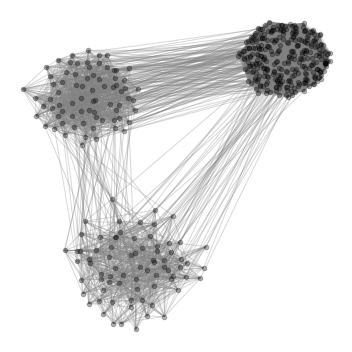

In [2]:
## define random graph with three clusters
sizes = [75, 75, 300]
probs = [[0.25, 0.01, 0.002], [0.01, 0.35, 0.007], [0.002, 0.007, 0.40]]
G = nx.stochastic_block_model(sizes, probs)

## draw it
pos=nx.spring_layout(G)
fig,ax=plt.subplots(figsize=(5,5))
ax.axis("off")
nx.draw_networkx(G,pos=pos,node_size=20,alpha=0.3,edge_color="grey",node_color="black",ax=ax,with_labels=False)
plt.tight_layout()

Next, let's do spectral clustering. Unfortunately, <code>networkx</code> does seem to be able to do spectral clustering. <code>scikit-learn</code>, however, provides several clustering algorithms, and among them spectral clustering.

In [3]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=3,affinity="precomputed")
clusters=sc.fit_predict(nx.adjacency_matrix(G))

We colour the vertices according to the clustering and draw the graph again.

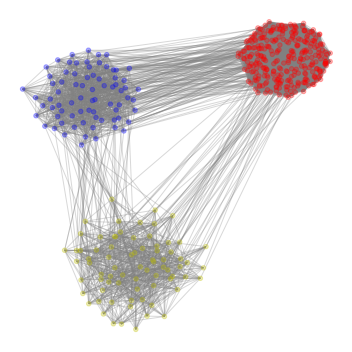

In [4]:
def colour_map(c):
    if c==0:
        return 'b'
    if c==1:
        return 'r'
    return 'y'
colours=[colour_map(c) for c in clusters]
    
fig,ax=plt.subplots(figsize=(5,5))
ax.axis("off")
nx.draw_networkx(G,pos=pos,node_size=20,with_labels=False,alpha=0.3,node_color=colours,ax=ax,edge_color="grey")
plt.tight_layout()


Sometimes, the best number of clusters can be determined by looking at the gap between consecutive eigenvalues. Here we see a large gap between the third and the fourth eigenvalue. Indeed, three clusters seems best.

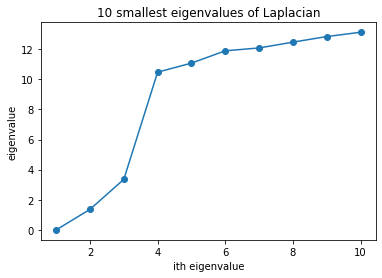

In [5]:
spec=sorted(nx.laplacian_spectrum(G))
plt.plot(range(1,11),spec[:10],"o-")
plt.title("10 smallest eigenvalues of Laplacian")
plt.xlabel("ith eigenvalue")
plt.ylabel("eigenvalue")
plt.show()